In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import fitsio
import scipy.stats #import kstest

In [79]:
tile_entropy = []
tile_id = []
petal_id = []
lastnight = []
for i in range(1,31):
    filename = "summary_rr_entropy_daily_{}.csv".format(20220300+i)
    try:
        data = pd.read_csv(filename)
        tile_entropy += list(data['H'])
        tile_id += list(data['TILEID'])
        petal_id += list(data['PETALID'])
        lastnight += list(data['LASTNIGHT'])
    except:
        pass
tile_entropy = np.array(tile_entropy)
tile_id = np.array(tile_id)
petal_id = np.array(petal_id)
lastnight = np.array(lastnight)

In [80]:
#data = pd.read_csv("summary_rr_entropy_daily.csv")
#tile_entropy = data["H_TILE"]
#tile_id = data["TILEID"]

6190


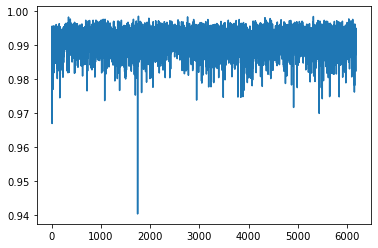

In [81]:
plt.plot(tile_entropy)
print(len(np.unique(tile_entropy)))

In [82]:
ll = tile_entropy<0.980
a = tile_id[ll]
b = petal_id[ll]
c = lastnight[ll]

for i in range(len(a)):
    print('{:05d} {} {}'.format(a[i], b[i], c[i]))

02838 6 20220301
03935 7 20220301
08944 3 20220301
04229 7 20220306
24978 6 20220307
02703 3 20220308
02569 9 20220308
04412 9 20220309
41587 4 20220310
41587 5 20220310
41587 6 20220310
41587 7 20220310
24635 6 20220311
21298 7 20220311
10822 7 20220312
23190 5 20220315
42915 4 20220315
40237 1 20220315
41658 0 20220316
42628 7 20220316
41647 5 20220316
41610 3 20220316
40224 7 20220316
42519 3 20220317
40505 5 20220318
43018 4 20220318
40961 6 20220319
42492 8 20220319
41606 6 20220319
40963 4 20220319
42505 4 20220319
24963 0 20220321
06834 1 20220323
10862 5 20220323
82636 7 20220324
05981 1 20220324
04126 4 20220325
07244 2 20220326
09977 1 20220326
09977 8 20220326
06918 1 20220326
09938 0 20220326
11557 5 20220326
02946 0 20220327
02946 6 20220327
07246 4 20220329
02839 0 20220330
02575 3 20220330
02575 7 20220330


In [26]:
ii = np.argsort(tile_entropy)
sorted_tiles = tile_id[ii]

In [27]:
for i in range(100):
    print(sorted_tiles[i], tile_entropy[ii[i]])

41587 0.9402651593259924
41587 0.9638486346205988
2838 0.96694364797774
41587 0.969067446825235
9977 0.9699180575870452
82636 0.971678008444738
24978 0.9736950095438464
23190 0.9738479942273236
9938 0.97423908232657
8944 0.9745218943544002
40224 0.9746572322870286
43018 0.9746609003191016
40505 0.9747421050093212
7246 0.9747960965841332
2946 0.9748549483559072
40961 0.9748686504292028
4412 0.9753197424505674
2946 0.9754076494124848
24635 0.9760704476696652
2575 0.9762114978994656
4229 0.9765623605890812
2569 0.9766907038735574
42492 0.9767547487463242
3935 0.9770400239543844
41587 0.9774603718323148
6918 0.977503479457002
5981 0.9775303285693906
10822 0.9776230657670814
41658 0.9777292887351264
42628 0.9777707257936892
24963 0.9778835947177108
9977 0.9780777930099984
40963 0.9780852708978834
2575 0.9781610876112962
10862 0.9783106291840808
6834 0.978745495313076
40237 0.9788614290601884
2839 0.9789313368213676
41610 0.9789972229292604
41606 0.9790160771527336
21298 0.979128354287374
41

In [44]:
tile_id = 4229
tile_id = 7256
#tile_id = 4408
#tile_id = 6206
tile_id = 7246
release = "daily"
release_path = "/global/cfs/cdirs/desi/spectro/redux/{}/".format(release)
search_path = "{}/tiles/cumulative/{}/*/redrock-*-{}-thru*.fits".format(release_path, tile_id, tile_id)
z_in_petal = {}
for petal_id in range(10):
    search_path = "{}/tiles/cumulative/{}/*/redrock-*-{}-thru*.fits".format(release_path, tile_id, tile_id)
    print(search_path)
    try:
        file_in = glob.glob(search_path)[0]
        this_petal_id = file_in.split('/')[-1].split('-')[-3]
        tile_file = file_in.replace("redrock-{}".format(this_petal_id), "redrock-{}".format(petal_id))
        print(tile_file)
        try:
            z_tile_per_exp = fitsio.read(tile_file, ext="REDSHIFTS")
            fmap_tile_per_exp = fitsio.read(tile_file, ext="FIBERMAP")
            exp_fmap_tile_per_exp = fitsio.read(tile_file, ext="EXP_FIBERMAP")
        except:
            pass
        try:
            ii = (z_tile_per_exp['ZWARN']==0) #& (exp_fmap_tile_per_exp['FIBERSTATUS']==0)
            n_good_z = np.count_nonzero(ii)
            #all_good_z += list(z_tile_per_exp['Z'][ii])
            z_in_petal[petal_id] = z_tile_per_exp['Z'][ii]
        except:
            pass
    except:
        pass

/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-0-7246-thru20220329.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-1-7246-thru20220329.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-2-7246-thru20220329.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-3-7246-thru20220329.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-4-7246-thru2022

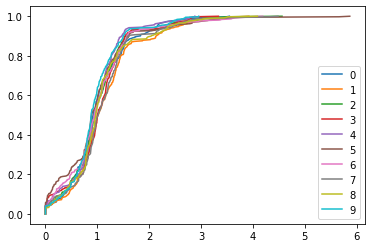

In [45]:
for i in z_in_petal.keys():
    z = z_in_petal[i]
    z = np.sort(z)
    n = len(z)
    cdf = np.linspace(0,1,n)
    plt.plot(z,cdf, label='{}'.format(i))
plt.legend()

In [46]:
p_value_results = np.ones((10,10))
for i in range(10):
    for j in range(10):
        p_value_results[i,j] = scipy.stats.kstest(z_in_petal[i],z_in_petal[j])[1]

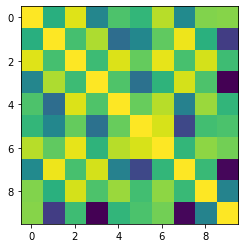

In [47]:
plt.imshow(np.log10(p_value_results))

In [48]:
print(p_value_results[p_value_results<0.001], np.min(p_value_results))

[6.94230559e-04 9.24110332e-05 8.10206001e-04 1.19558004e-05
 6.94230559e-04 8.10206001e-04 1.38542462e-04 1.38542462e-04
 1.44903938e-05 9.24110332e-05 1.19558004e-05 1.44903938e-05] 1.1955800373830705e-05


In [33]:
p_value_results[7,:]

array([1.70680006e-01, 1.31015340e-01, 2.86563136e-01, 1.03560880e-02,
       2.16716361e-02, 1.46736964e-04, 5.39032232e-01, 1.00000000e+00,
       3.45619854e-01, 5.69855142e-01])

In [101]:
sky_entropy_files = glob.glob("entropy_sky_sframe_20220329_*.csv")
print(sky_entropy_files)

['entropy_sky_sframe_20220329_00127999.csv', 'entropy_sky_sframe_20220329_00128000.csv', 'entropy_sky_sframe_20220329_00128006.csv', 'entropy_sky_sframe_20220329_00128008.csv', 'entropy_sky_sframe_20220329_00127995.csv', 'entropy_sky_sframe_20220329_00128003.csv', 'entropy_sky_sframe_20220329_00128004.csv', 'entropy_sky_sframe_20220329_00127998.csv', 'entropy_sky_sframe_20220329_00127997.csv', 'entropy_sky_sframe_20220329_00127994.csv', 'entropy_sky_sframe_20220329_00128005.csv', 'entropy_sky_sframe_20220329_00128007.csv', 'entropy_sky_sframe_20220329_00127996.csv', 'entropy_sky_sframe_20220329_00128002.csv']


In [102]:
tile_entropy = []
exp_id = []
petal_id = []
lastnight = []
band = []
for filename in sky_entropy_files:
    try:
        data = pd.read_csv(filename)
        tile_entropy += list(data['H'])
        exp_id += list(data['EXPID'])
        petal_id += list(data['PETAL'])
        lastnight += list(data['NIGHT'])
        band += list(data['BAND'])
    except:
        pass
tile_entropy = np.array(tile_entropy)
exp_id = np.array(exp_id)
petal_id = np.array(petal_id)
lastnight = np.array(lastnight)
band = np.array(band)

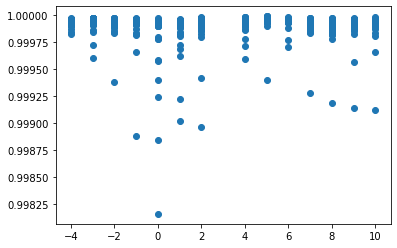

In [103]:
plt.scatter(exp_id-127998, tile_entropy)

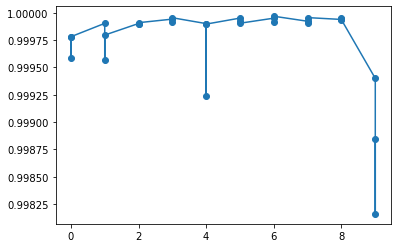

In [104]:
ii = exp_id==127998
plt.plot(petal_id[ii], tile_entropy[ii])
plt.scatter(petal_id[ii], tile_entropy[ii])